In [7]:
import sys
# !{sys.executable} -m pip install pyfolio
!{sys.executable} -m pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 3.3 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.3-cp39-cp39-macosx_10_9_x86_64.whl size=253578 sha256=6a6f4897a7baf89b303e231869ca498568f2fd449cb94538dbcba5a3dc6c3be4
  Stored in directory: /Users/tomasz/Library/Caches/pip/wheels/a7/64/49/81f05b55b5fcafe2ea6316aac808b15228715abc3d2632a240
Successfully built peewee
  Attempting uninstall: peewee
    Found existing installation: peewee 3.17.8
    Uninstalling peewee-3.17.8:
      Successfully uninstalled peewee-3.17.8
  Attempting uninstall: numpy
    Fou

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyfolio as pf
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
sp = yf.download(['SPY'], start='2004-01-12', end='2009-12-31')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [33]:
files = ['googl.us.txt']
labels = ['GOOGL']

# Tworzenie pustego DataFrame
data = pd.DataFrame()

# Iteracja po plikach i ładowanie danych
for file, label in zip(files, labels):
    df = pd.read_csv('data/'+file, usecols=['Date', 'Close'])  # Wczytanie tylko daty i ceny zamknięcia
    df['Date'] = pd.to_datetime(df['Date']) # Konwersja daty
    df.set_index('Date', inplace=True)  # Ustawienie daty jako indeksu
    data[label] = df['Close']  # Dodanie kolumny z cenami zamknięcia

# Filtrowanie zakresu lat 2006-2015
data = data.loc['2006-01-01':'2015-12-31']
# Wyznaczenie zwrotów
# returns = data.pct_change()
# # Pominięcie pierwszego wiersza (bo NaN)
# returns = returns.iloc[1:]

# T = 10
# # Obliczenie macierzy kowariancji
# cov_matrix = (returns.cov())*252

# weights2 = np.array([0, 0, 0, 1])
# var_pf2 = np.dot(weights2.T, np.dot(cov_matrix, weights2))
# stddev_pf2 = np.sqrt(var_pf2)
# initial_value_googl = data['GOOGL'].iloc[0]
# final_value_googl = data['GOOGL'].iloc[-1]
# annualized_return_googl = (final_value_googl / initial_value_googl) ** (1 / T) - 1
# s2 = (annualized_return_googl-rfr)/stddev_pf2
# print(f"Wskaźnik Sharpe'a portfela 2 (tylko GOOGL): {s2:.2f}")

In [5]:
pf.timeseries

<module 'pyfolio.timeseries' from '/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py'>

In [6]:
annualized_return_googl

0.13587002086986666

In [7]:
returns.std()*np.sqrt(252)

NVDA     0.484387
INTC     0.299135
MSFT     0.281692
GOOGL    0.310730
dtype: float64

In [36]:
stddev_pf2

0.31073008182760486

In [5]:
data.GOOGL.head()

Date
2006-01-03    217.62
2006-01-04    222.62
2006-01-05    225.62
2006-01-06    232.83
2006-01-09    233.45
Name: GOOGL, dtype: float64

<AxesSubplot:xlabel='Date'>

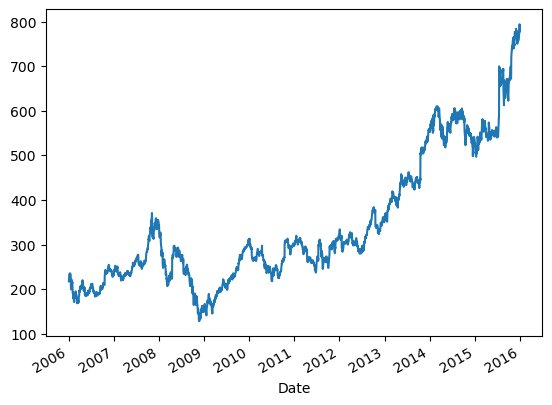

In [22]:
data.GOOGL.plot()

In [21]:
rfr = 0.04
target_return = 0

returns = data.GOOGL.pct_change()
negative_returns = returns.loc[returns < target_return]
expected_return = returns.mean()
down_std = negative_returns.std()

sortino_ratio = ((expected_return+1)**252-1 - rfr) / (down_std*np.sqrt(252))
sortino_ratio

0.7023121928525282

In [27]:
# sharpe_ratio = ((expected_return+1)**252-1 - 0) / (returns.std()*np.sqrt(252))
sharpe_ratio = (expected_return*252 - 0) / (returns.std()*np.sqrt(252))
sharpe_ratio

0.5645335460778814

In [14]:
annualized_return_googl

0.13587002086986666

In [15]:
(expected_return+1)**252-1

0.19167100625299938

In [16]:
expected_return*252

0.175417554967208

In [102]:
ep.stats.annualization_factor('daily', None)

252

In [95]:
down_std

0.013604171224850024

In [57]:
rf_daily = rfr / 252
    
# Excess returns over risk-free rate
excess_returns = returns - rf_daily

# Compute downside deviation (standard deviation of negative excess returns)
downside_returns = excess_returns[excess_returns < 0]
downside_deviation = np.std(downside_returns, ddof=1)  # Unbiased estimator (ddof=1)

# Mean excess return
mean_excess_return = np.mean(excess_returns)

mean_excess_return / downside_deviation

0.039530348081180895

In [10]:
pf.timeseries.sortino_ratio(returns)

0.8546444489711593

In [11]:
pf.show_perf_stats(returns)

Start date,2006-01-03
End date,2015-12-31
Total months,119
,Backtest
Annual return,13.604%
Cumulative returns,257.509%
Annual volatility,31.073%
Sharpe ratio,0.56
Calmar ratio,0.21
Stability,0.76
Max drawdown,-65.295%


In [71]:
pf.timeseries.sharpe_ratio(returns, 0)

0.5645335460778815

<AxesSubplot:xlabel='Date'>

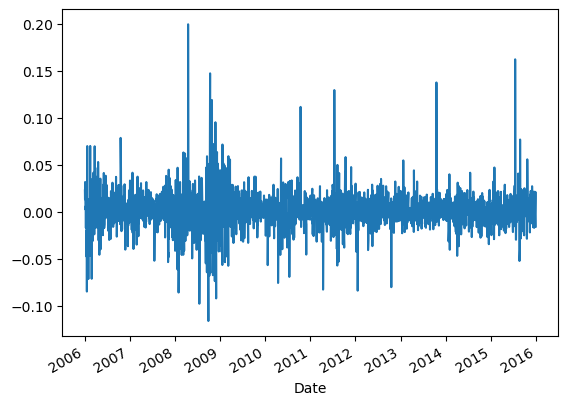

In [72]:
returns.plot()

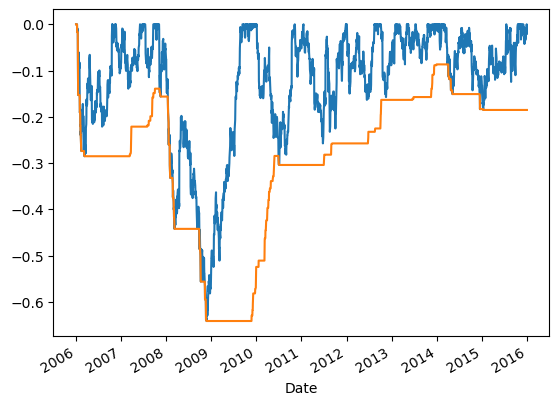

In [30]:
# Calculate the maximum value of returns using rolling().max()
roll_max = data.GOOGL.rolling(min_periods=1,window=252).max()
# Calculate daily draw-down from rollingax
daily_drawdown = data.GOOGL/roll_max - 1.0
# Calculate maximum daily draw-down
max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=252).min()
# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()


In [34]:
data

,GOOGL
Date,
2006-01-03,217.62
2006-01-04,222.62
2006-01-05,225.62
2006-01-06,232.83
2006-01-09,233.45
...,...
2015-12-24,765.84
2015-12-28,782.24
2015-12-29,793.96


In [43]:
roll_max

,GOOGL
Date,
2006-01-03,217.62
2006-01-04,222.62
2006-01-05,225.62
2006-01-06,232.83
2006-01-09,233.45
...,...
2015-12-24,783.79
2015-12-28,783.79
2015-12-29,793.96


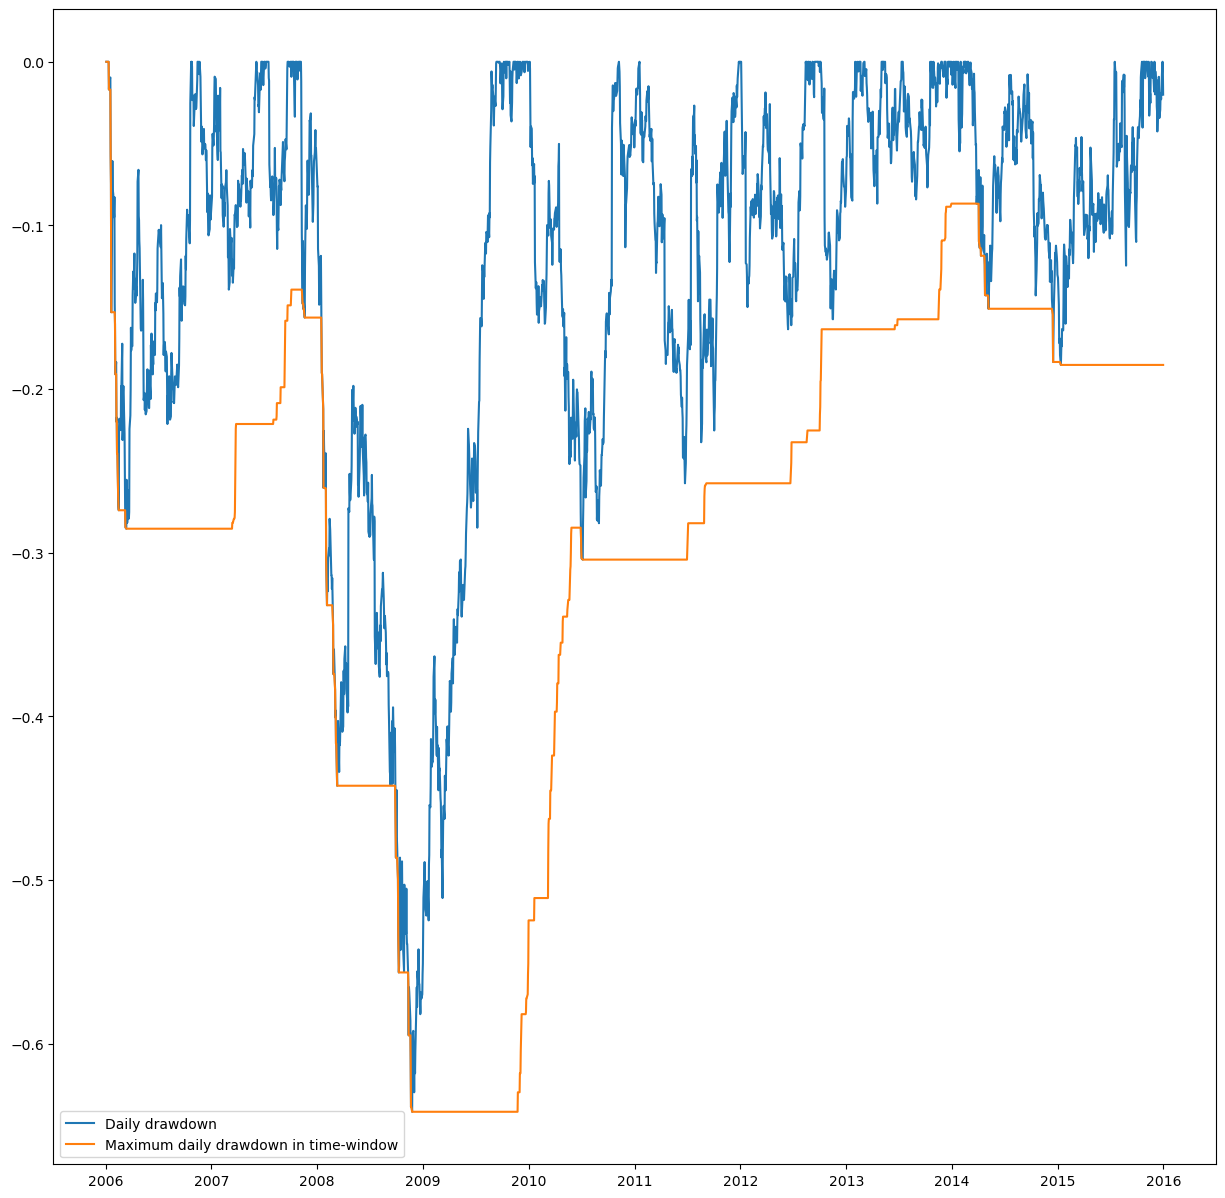

In [42]:
roll_max = data.rolling(center=False,min_periods=1,window=252).max()
# Calculate the daily draw-down relative to the max
daily_draw_down = data/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(data.index, daily_draw_down, label='Daily drawdown')
plt.plot(data.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [46]:
positions = pd.read_csv('data/test_pos.csv', index_col=0)
positions.index = pd.to_datetime(positions.index)

In [53]:
positions

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.078750,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.250000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2004-01-13 00:00:00+00:00,12060.86,11942.246250,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2004-01-14 00:00:00+00:00,13102.40,15534.281250,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2004-01-15 00:00:00+00:00,15518.40,14547.050000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316
...,...,...,...,...,...,...,...,...
2009-12-24 00:00:00+00:00,-1199.11,1316.857500,22778.660580,-3562.47039,76601.638113,36280.269375,17740.890304,16350.679211
2009-12-28 00:00:00+00:00,589.80,673.840032,24170.422856,-1765.41500,83143.517604,37499.607147,15692.520137,7641.201795
2009-12-29 00:00:00+00:00,292.50,334.920016,20993.396552,858.85252,94500.729990,50509.461877,7946.648597,-6583.290764


In [56]:
returns = positions.sum(axis=1).pct_change().dropna()

In [62]:
from IPython.display import display
from tabulate import tabulate

In [60]:
display(positions)

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.078750,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.250000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2004-01-13 00:00:00+00:00,12060.86,11942.246250,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2004-01-14 00:00:00+00:00,13102.40,15534.281250,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2004-01-15 00:00:00+00:00,15518.40,14547.050000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316
...,...,...,...,...,...,...,...,...
2009-12-24 00:00:00+00:00,-1199.11,1316.857500,22778.660580,-3562.47039,76601.638113,36280.269375,17740.890304,16350.679211
2009-12-28 00:00:00+00:00,589.80,673.840032,24170.422856,-1765.41500,83143.517604,37499.607147,15692.520137,7641.201795
2009-12-29 00:00:00+00:00,292.50,334.920016,20993.396552,858.85252,94500.729990,50509.461877,7946.648597,-6583.290764


In [63]:
print(tabulate(positions, headers = 'keys', tablefmt = 'psql'))

+---------------------------+-----------+--------------+-------------+-------------+-------------+-------------+-------------+---------------+
| index                     |       AMD |         CERN |        COST |        DELL |         GPS |        INTC |         MMM |          cash |
|---------------------------+-----------+--------------+-------------+-------------+-------------+-------------+-------------+---------------|
| 2004-01-09 00:00:00+00:00 |   6961.92 |  21017.1     |   7282.27   |  21264.6    |   7091.08   |  21259.3    |  21316.1    |  -6192.36     |
| 2004-01-12 00:00:00+00:00 |  18198.6  |  18071.2     |  17675.8    |  10804.3    |  10685.4    |  17872.5    |  10882      |  -3329.29     |
| 2004-01-13 00:00:00+00:00 |  12060.9  |  11942.2     |  12838.5    |  16078.9    |  16272.1    |  12465.4    |  12579.1    |   4708.04     |
| 2004-01-14 00:00:00+00:00 |  13102.4  |  15534.3     |  14447.4    |  15414.5    |  15666.4    |  14884.1    |  13454.5    |  -2749.47     |

In [64]:
from itables import show

ModuleNotFoundError: No module named 'itables'

Top 10 long positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


Top 10 short positions of all time,max
AMD,-30.12%
DELL,-26.58%
CERN,-25.51%
MMM,-22.62%
GPS,-20.09%
INTC,-18.47%
COST,-16.44%


Top 10 positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


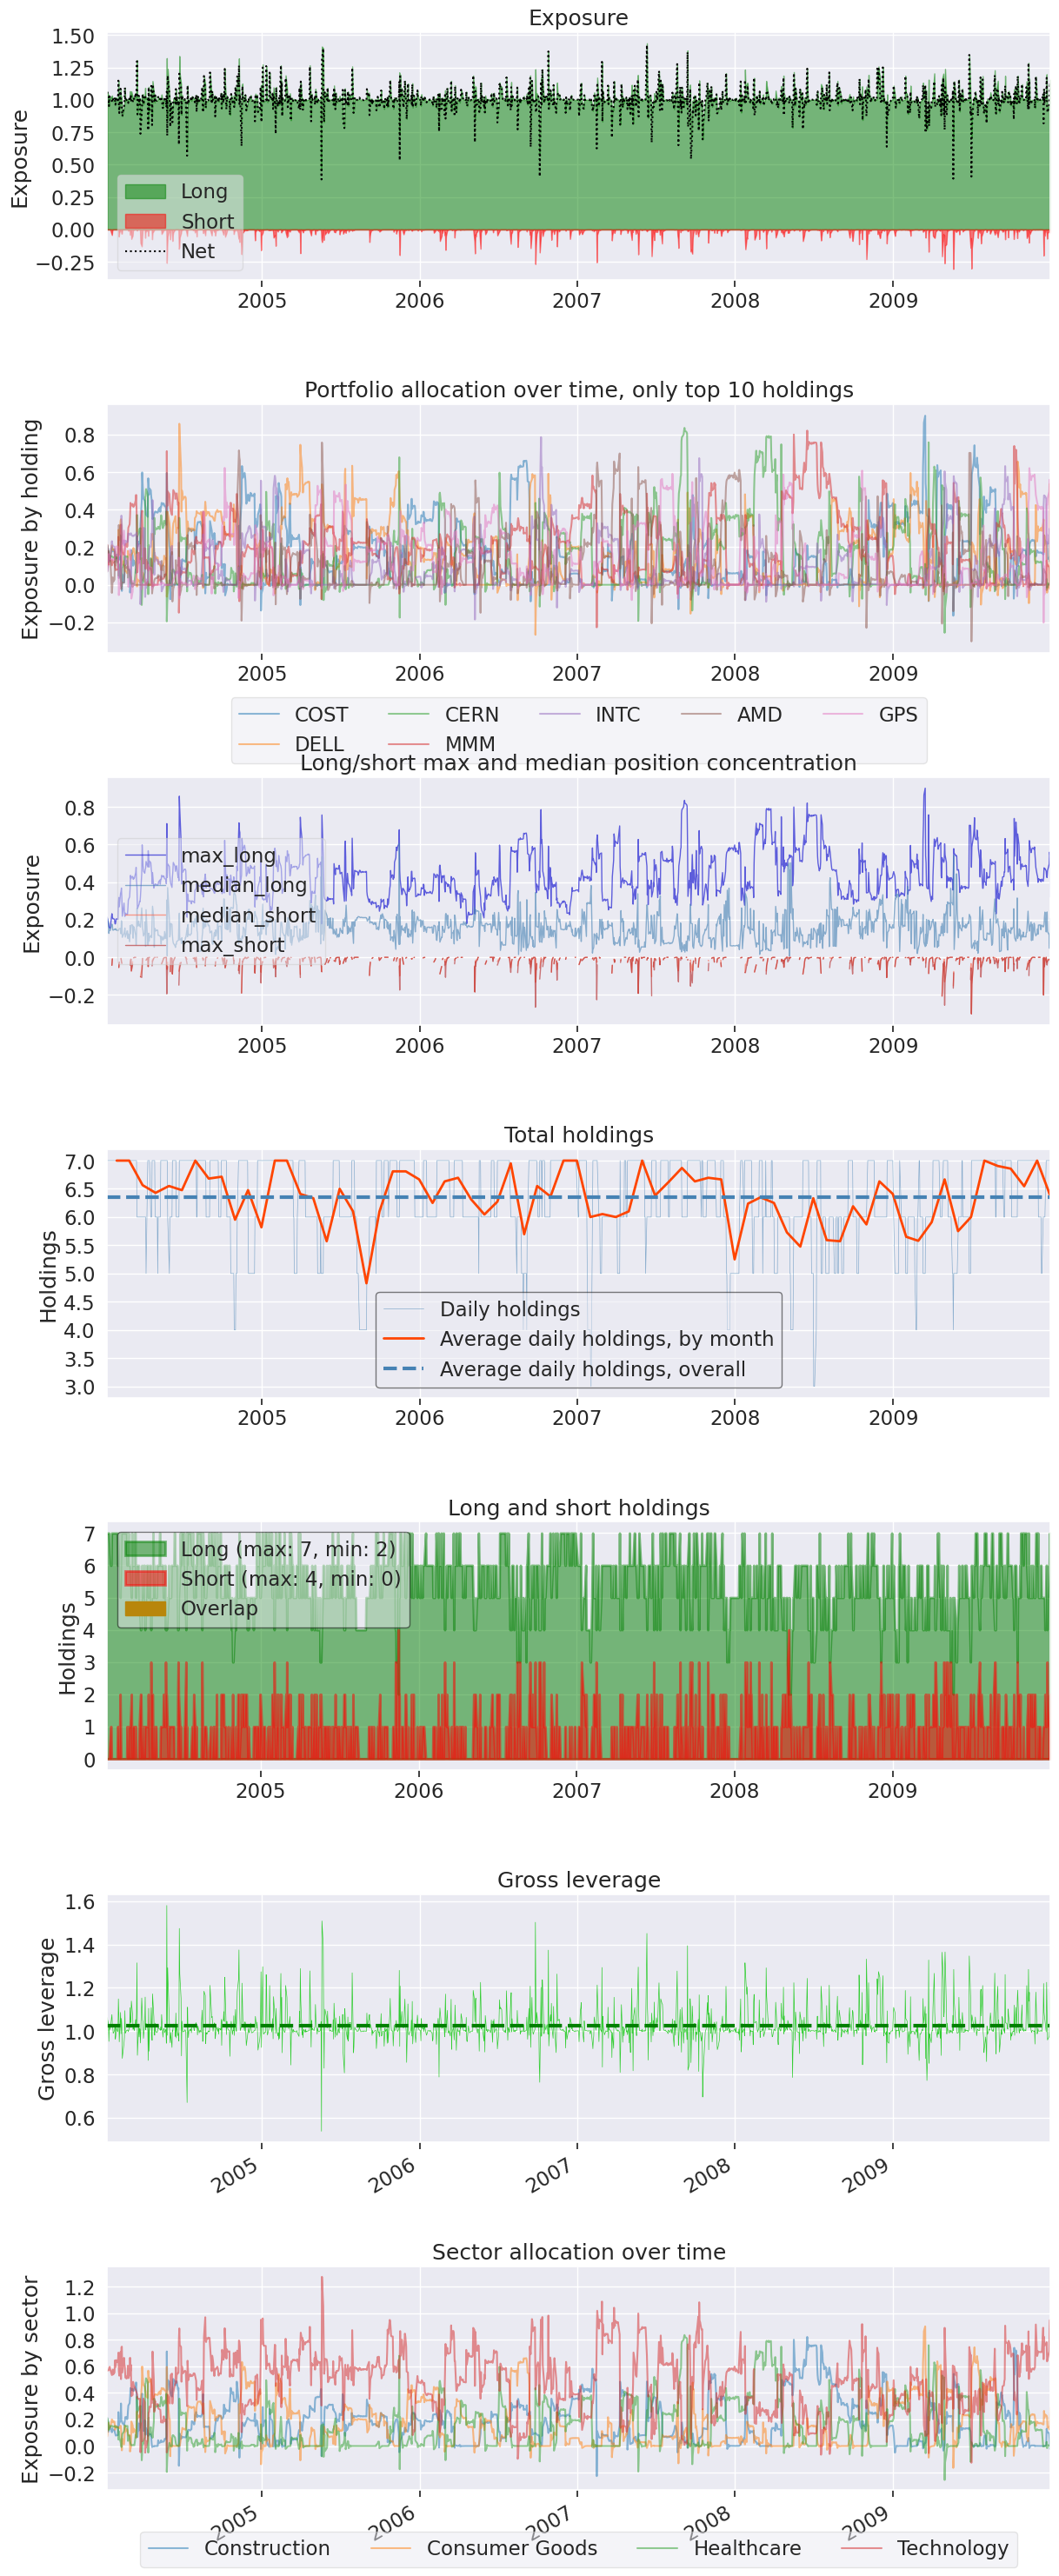

In [57]:
# Define sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

# Create sector exposure tear sheet
pf.create_position_tear_sheet(returns,positions, sector_mappings=sect_map)

Start date,2004-01-12
End date,2009-12-31
Total months,71
,Backtest
Annual return,8.791%
Cumulative returns,65.404%
Annual volatility,26.26%
Sharpe ratio,0.45
Calmar ratio,0.15
Stability,0.00
Max drawdown,-60.391%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.39,2007-11-06,2009-03-09,NaT,NaN
1,24.10,2005-07-28,2006-09-07,2007-05-22,474
2,11.89,2004-06-25,2004-08-12,2004-11-05,96
3,10.87,2004-11-15,2005-04-18,2005-07-14,174
4,9.51,2007-07-16,2007-08-06,2007-09-13,44


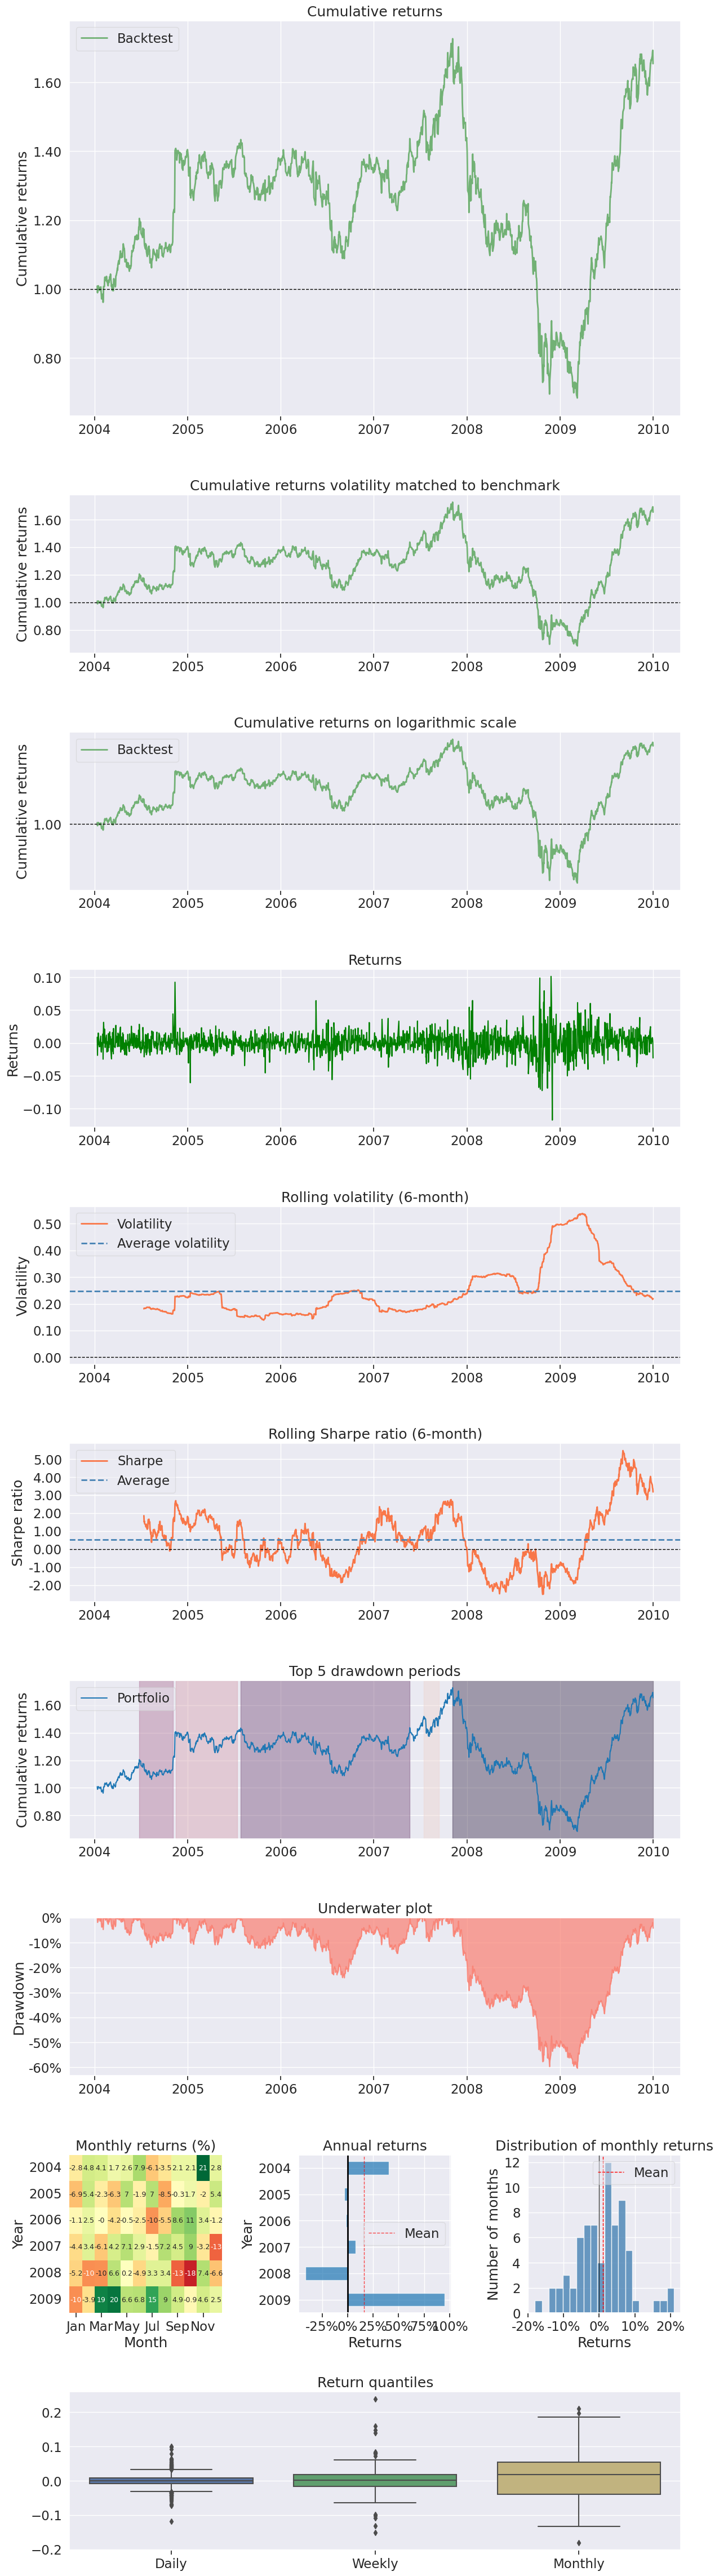

In [58]:
pf.create_returns_tear_sheet(returns)